In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creating and using a DatetimeIndex

El indexado de Pandas, es una herramienta bastante poderosa a la hora de de manipular series temporales. Pandas dispone de la función **pd.to_datetime()** para realizar convertir a tipo fecha. Si le pasamos una fecha como string por ejemplo: ['2015-01-01 091234','2015-01-01 091234'] y le especificamos mediante la variable **format** el formato de la fecha, format='%Y-%m-%d %H%M%S, pandas procederá a parsear de forma adecuada la fecha indicada para construir nuestro objeto de tipo fecha. 

In [3]:
#Cargamos los datos
df = pd.read_csv('weather_data_austin_2010.csv')

#Vemos que la carga se realizó de forma adecuada
df.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


In [6]:
#Extraemos la fecha
date_list = list(df.iloc[:, 3].values)

#Extraemos la temperatura
temperature_list = list(df.iloc[:,0].values)

In [9]:
#Pasamos el fotmato de fecha que deseamos usar
time_format = '%Y-%m-%d %H:%M'

#Convertimos nuestra lista a formato tipo fecha
my_datetimes = pd.to_datetime(date_list, format = time_format)

#Nos creamos la serie
time_series = pd.Series(temperature_list, index = my_datetimes)

#Vemos el resultado
time_series.head()

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
dtype: float64

# Partial string indexing and slicing

Las series temporales en Pandas permiten la indexación parcial, es decir, nos permite seleccionar de forma sencilla una ventana temporal en la cual estemos interesados. La función **read_csv()** dispone del argumento **parse_dates**, este argumento por defecto toma el valor de **False**, pero si le cambiamos el valor a **True**, en caso de que encuentre alguna columna con formato fecha la intentará parsear.

In [10]:
#Cargamos los datos
df = pd.read_csv('weather_data_austin_2010.csv', parse_dates=True, index_col = 'Date')

#Vemos como se cargaron los datos
df.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


Podemos ver que automáticamente Pandas es capaz de captar la fecha y parsearla de forma adecuada. Por ejemplo si deseamos seleccionar la información que corresponde a una fecha determinada podemos acceder de forma sencilla. Además podemos seleccionar estas fechas de forma muy diversa.

In [12]:
#Seleccionamos la información de una fecha concreta
ts1 = df.loc['2010-10-11 21:00:00']
ts1

Temperature    69.0
DewPoint       59.8
Pressure        1.0
Name: 2010-10-11 21:00:00, dtype: float64

In [14]:
ts2 = df.loc['July 4th, 2010']
ts2.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-07-04 00:00:00,77.6,70.8,1.0
2010-07-04 01:00:00,76.3,71.1,1.0
2010-07-04 02:00:00,75.5,71.1,1.0
2010-07-04 03:00:00,74.9,71.1,1.0
2010-07-04 04:00:00,74.6,71.1,1.0


También podemos seleccionar rango de fechas

In [16]:
ts3 = df.loc['2010-12-15': '2010-12-20']
ts3.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-12-15 00:00:00,48.0,40.5,1.0
2010-12-15 01:00:00,47.2,40.3,1.0
2010-12-15 02:00:00,46.5,40.0,1.0
2010-12-15 03:00:00,46.0,39.7,1.0
2010-12-15 04:00:00,45.6,39.5,1.0


# Reindexing the Index

La reindexación es útil a la hora de combinar dos series temporales. A la hora de reindexar indicamos el nuevo índice y le pedimos a Pandas que intente machear mediante estos índices los datos anteriores. En caso de que no existan valores para los índices indicados Pandas rellenará estos con NaN, pero podemos indicarles como queremos que sea este relleno si deseamos que no se rellenen mediante valores perdidos.

In [34]:
#Seleccionamos la temperatura del 1 al 10 de julio
ts1 = df.loc['2010-07-01': '2010-07-11']
ts1.tail()

,Temperature,DewPoint,Pressure
Date,,,
2010-07-11 19:00:00,88.2,68.7,1.0
2010-07-11 20:00:00,84.8,69.4,1.0
2010-07-11 21:00:00,82.5,70.0,1.0
2010-07-11 22:00:00,80.6,70.5,1.0
2010-07-11 23:00:00,79.0,70.6,1.0


In [35]:
#Seleccionamos la info para el 11 de julio
ts2 = df.loc['2010-07-11']
ts2.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-07-11 00:00:00,78.0,70.7,1.0
2010-07-11 01:00:00,76.5,71.0,1.0
2010-07-11 02:00:00,75.7,71.0,1.0
2010-07-11 03:00:00,75.1,71.1,1.0
2010-07-11 04:00:00,74.7,71.1,1.0


In [36]:
#Reindexamos 
ts3 = ts2.reindex(ts1.index)
ts3

,Temperature,DewPoint,Pressure
Date,,,
2010-07-01 00:00:00,NaN,NaN,NaN
2010-07-01 01:00:00,NaN,NaN,NaN
2010-07-01 02:00:00,NaN,NaN,NaN
2010-07-01 03:00:00,NaN,NaN,NaN
2010-07-01 04:00:00,NaN,NaN,NaN
2010-07-01 05:00:00,NaN,NaN,NaN
2010-07-01 06:00:00,NaN,NaN,NaN
2010-07-01 07:00:00,NaN,NaN,NaN
2010-07-01 08:00:00,NaN,NaN,NaN


# Resampling and frequency

Pandas dispone de una serie de métodos para reescalar series temporales. Podemos realizar tanto **downsampling** donde lo que hacemos en este caso es pasar de una muestra de rango de días a una muestra de rango de semanas, también podemos hacer uso de la técnica de **upsampling**, en este caso hacemos lo contrario, la forma de realizar ambas muestras es bastante similar. Ambos hacen uso del concepto **método chaining**: df.method1().method2().method3().

In [39]:
#Calculamos la media de temperatura cada 6 horas para cada uno de los días
df1 = df['Temperature'].resample('6h').mean()
df1.head(10)

Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
2010-01-02 06:00:00    46.350000
2010-01-02 12:00:00    58.366667
2010-01-02 18:00:00    49.950000
2010-01-03 00:00:00    44.783333
2010-01-03 06:00:00    46.483333
Freq: 6H, Name: Temperature, dtype: float64

In [40]:
#Calculamos el número de datos registrados cada uno de los días
df2 = df['Temperature'].resample('D').count()
df2.head(10)

Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
2010-01-06    24
2010-01-07    24
2010-01-08    24
2010-01-09    24
2010-01-10    24
Freq: D, Name: Temperature, dtype: int64

# Separating and resampling

Con pandas podemos remuestrear nuestros datos de diferente forma. Por ejemplo, podemos remuestrear los datos de diferentes meses con diferentes agregaciones. 

In [41]:
#Seleccionamos la temperatura del mes de agosto
agosto = df.loc['2010-08']

#Vemos la temperatura máxima para cada uno de los días de agosto
agosto['Temperature'].resample('D').max()

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
2010-08-06    95.2
2010-08-07    95.3
2010-08-08    95.2
2010-08-09    95.2
2010-08-10    95.1
2010-08-11    95.0
2010-08-12    94.9
2010-08-13    95.0
2010-08-14    94.9
2010-08-15    94.7
2010-08-16    94.7
2010-08-17    94.8
2010-08-18    94.8
2010-08-19    94.8
2010-08-20    94.8
2010-08-21    94.7
2010-08-22    94.6
2010-08-23    94.5
2010-08-24    94.3
2010-08-25    94.1
2010-08-26    94.0
2010-08-27    93.7
2010-08-28    93.5
2010-08-29    93.3
2010-08-30    93.3
2010-08-31    93.1
Freq: D, Name: Temperature, dtype: float64

In [42]:
#Extraemos la temperatura para el mes de febrero
febrero = df.loc['2010-02']

#Obtenemos la temperatura mínima para cada uno de los días de febrero
febrero['Temperature'].resample('D').min()

Date
2010-02-01    43.8
2010-02-02    44.3
2010-02-03    44.6
2010-02-04    44.5
2010-02-05    44.3
2010-02-06    44.1
2010-02-07    44.3
2010-02-08    44.7
2010-02-09    44.7
2010-02-10    44.9
2010-02-11    45.2
2010-02-12    45.5
2010-02-13    46.0
2010-02-14    46.6
2010-02-15    46.9
2010-02-16    47.1
2010-02-17    47.2
2010-02-18    47.2
2010-02-19    47.4
2010-02-20    47.7
2010-02-21    47.6
2010-02-22    47.7
2010-02-23    47.7
2010-02-24    48.1
2010-02-25    48.4
2010-02-26    48.5
2010-02-27    48.6
2010-02-28    48.6
Freq: D, Name: Temperature, dtype: float64

# Rolling mean and frequency

Rolling means (medias móviles) es generalmente usado para suavizar las fluctuaciones en cortos espacios de tiempo en los problemas de series temporales. 

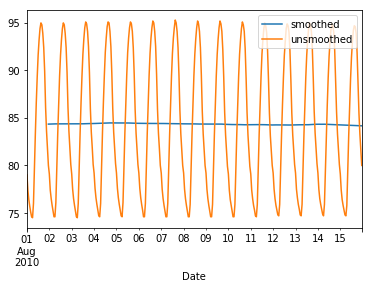

In [50]:
#Seleccinamos los datos desde el 1 al 15 de agosto
unsmoothed = df['Temperature']['2010-Aug-01':'2010-Aug-15']

#Aplicamos medias moviles con una ventana de 24h
smoothed = unsmoothed.rolling(window = 24).mean()

#Nos creamos un nuevo dataframe
agosto = pd.DataFrame({'smoothed': smoothed, 'unsmoothed':unsmoothed})

#Mostraomos los resultados gráficamente
agosto.plot()
plt.show()

# Method chaining and filtering

La metodología de encadenamiento se trata de una técnica muy poderosa a la hora de filtrar y limpiar datos. 

In [83]:
#Cargamos datos
df = pd.read_csv('austin_airport_departure_data_2015_july.csv', header = 10, parse_dates=['Date (MM/DD/YYYY)'],
                index_col = 'Date (MM/DD/YYYY)')
df = df.drop('NaT')
#Vemos que los datos se cargaron de forma adecuada
df.tail()

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes),Unnamed: 17
Date (MM/DD/YYYY),,,,,,,,,,,,,,,,,
2015-07-31,WN,4819.0,N7741C,PHX,17:25,17:48,150.0,139.0,23.0,17:59,11.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-31,WN,4913.0,N622SW,TPA,11:35,11:32,140.0,150.0,-3.0,11:46,14.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-31,WN,4924.0,N910WN,LAX,16:00,16:51,185.0,176.0,51.0,17:04,13.0,6.0,0.0,0.0,0.0,36.0,NaN
2015-07-31,WN,4927.0,N8327A,DCA,12:40,13:48,195.0,175.0,68.0,13:59,11.0,0.0,0.0,0.0,0.0,48.0,NaN
2015-07-31,WN,5888.0,N290WN,DAL,20:00,21:04,55.0,49.0,64.0,21:13,9.0,0.0,0.0,0.0,0.0,58.0,NaN


Si queremos del nombre de nuestras columnas eliminar los espacios en blanco al principio y al final de dicho nombre podemos hacer uso del método **strip()**.

In [84]:
#Eliminamos los espacios en blanco de la cabecera de nuestro conjunto de datos
df.columns = df.columns.str.strip()

El método **contains()** nos permite determinar que strings contienen un string indicado. Este método nos retorna una serie de igual longitud que el DataFrame original, con el valor de **True** si dicha observación machea con el string indicado y **False** en caso contrario.

In [88]:
#Vemos los datos que corresponden al aeropuerto de Dallas
dallas = df['Destination Airport'].str.contains('DAL')

In [90]:
#Vemos el número de vuelos que salen diariamente del aeropuerto de Dallas
daily_departures = dallas.resample('D').sum()

#Vemos un resumen estadístico
stats = daily_departures.describe()
stats

count    31.000000
mean      9.322581
std       1.989759
min       3.000000
25%       9.500000
50%      10.000000
75%      10.000000
max      11.000000
Name: Destination Airport, dtype: float64

# Missing values and interpolation

Una aplicación común de la interpolación es la de rellenar los valores perdidos. A continuación procederemos a aplicar la interpolación lineal para rellenar los valores perdidos.

In [120]:
#Cargamos los datos
df = pd.read_csv('weather_data_austin_2010.csv', parse_dates=True, index_col = 'Date')

#Nos creamos nuestra serie
ts1 = df.loc['2010-07-01': '2010-07-11']['Temperature']
ts2 = df.loc['2010-07-01': '2010-07-08']['Temperature']

#Interpolamos 
ts3_interpolate = ts2.reindex(ts1.index).interpolate(how = 'linear')
ts3_interpolate.tail()

Date
2010-07-11 19:00:00    78.8
2010-07-11 20:00:00    78.8
2010-07-11 21:00:00    78.8
2010-07-11 22:00:00    78.8
2010-07-11 23:00:00    78.8
Name: Temperature, dtype: float64

In [123]:
#Vemos la diferencia absoluta entre ts3 interpolado y ts1
differences = np.abs(ts1 - ts3_interpolate)

#Vemos un descriptivo de estas diferencias
print(differences.describe())

count    264.000000
mean       1.748106
std        3.728606
min        0.000000
25%        0.000000
50%        0.000000
75%        0.650000
max       14.000000
Name: Temperature, dtype: float64


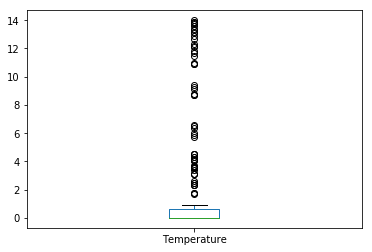

In [130]:
#Vemos la distribución de la diferencias
differences.plot(kind = 'box')
plt.show()

# Time zones and conversion

Cuando trabajamos con zonas horarias en Pandas, este asume que se está usando como índice la fecha. En el siguiente ejercicio veremos como manejar zonas horarias en columnas y no en índices.

In [140]:
#Cargamos los datos
df = pd.read_csv('austin_airport_departure_data_2015_july.csv', header = 10)
df.columns = df.columns.str.strip()
df = df.drop(1740)
#Vemos que se ha realizado la carga de forma correcta
df.tail(3)

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes),Unnamed: 17
1737,WN,07/31/2015,4924.0,N910WN,LAX,16:00,16:51,185.0,176.0,51.0,17:04,13.0,6.0,0.0,0.0,0.0,36.0,NaN
1738,WN,07/31/2015,4927.0,N8327A,DCA,12:40,13:48,195.0,175.0,68.0,13:59,11.0,0.0,0.0,0.0,0.0,48.0,NaN
1739,WN,07/31/2015,5888.0,N290WN,DAL,20:00,21:04,55.0,49.0,64.0,21:13,9.0,0.0,0.0,0.0,0.0,58.0,NaN


In [142]:
#Filtramos por los vuelos dirigios a Los Ángeles
LA = df[df['Destination Airport'].str.contains('LAX')]

#Comprobamos que el filtrado se hizo de forma adecuada
print(LA['Destination Airport'].unique())

['LAX']


In [156]:
#Concatenamos las columnas 'Date (MM/DD/YYYY)' y 'Wheels-off Time' mediante un espacio en blanco y las pasamos a tipo
#fecha
times_tz_zone = pd.to_datetime(LA['Date (MM/DD/YYYY)'] + ' ' + LA['Wheels-off Time'])
times_tz_zone.head()

33    2015-07-01 05:43:00
55    2015-07-01 16:27:00
91    2015-07-02 05:47:00
113   2015-07-02 16:23:00
134   2015-07-03 05:30:00
dtype: datetime64[ns]

In [157]:
#Hacemos uso del método Series.dt.tz_localize() para localizar la zona horaria 'US/Central'
times_tz_central = times_tz_zone.dt.tz_localize('US/Central')
times_tz_central.head()

33    2015-07-01 05:43:00-05:00
55    2015-07-01 16:27:00-05:00
91    2015-07-02 05:47:00-05:00
113   2015-07-02 16:23:00-05:00
134   2015-07-03 05:30:00-05:00
dtype: datetime64[ns, US/Central]

In [158]:
#Hacemos uso del método Series.df.tz_convert() para transformar de 'US/Central' a 'US/Pacific'
times_tz_pacific = times_tz_central.dt.tz_convert('US/Pacific')
times_tz_pacific.head()

33    2015-07-01 03:43:00-07:00
55    2015-07-01 14:27:00-07:00
91    2015-07-02 03:47:00-07:00
113   2015-07-02 14:23:00-07:00
134   2015-07-03 03:30:00-07:00
dtype: datetime64[ns, US/Pacific]

# Plotting time series, datetime indexing

Pandas también nos permite representar mediante plots nuestras series temporales.

In [161]:
#Cargamos los datos
df = pd.read_csv('weather_data_austin_2010.csv', parse_dates=True, index_col = 'Date')

#Vemos que se cargaron de forma correcta
df.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


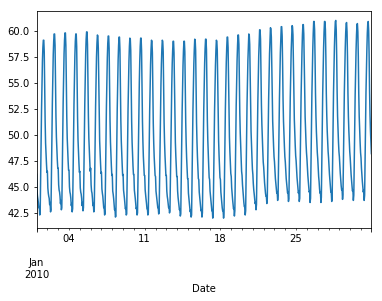

In [164]:
#Visualizamos los resultados
df['Temperature'].iloc[0:744].plot()
plt.show()

# Plotting date ranges, partial indexing

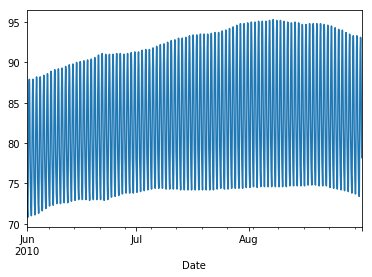

In [165]:
#Mostramos la temperatura de los meses de junio julio y agosto
df.loc['2010-Jun':'2010-Aug', 'Temperature'].plot()
plt.show()
plt.clf()